# STP598 Machine Learning \& Deep Learning
## Written Assignment 3
### Due 11:59pm Friday Oct. 27, 2023 on Canvas

### name,  id

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

## Classification

We have learned several classification methods including `LogisticRegression`, `LinearDiscriminantAnalysis`, `QuadraticDiscriminantAnalysis`, `RandomForestClassifier` and `GaussianProcessClassifier`. It is of interest to compare them side-by-side. To visualize the results in a 2d picture, it is important to plot their boundaries. In this homework, we will compare the classification boundaries of different methods.

Let's first look at a synthetic example.

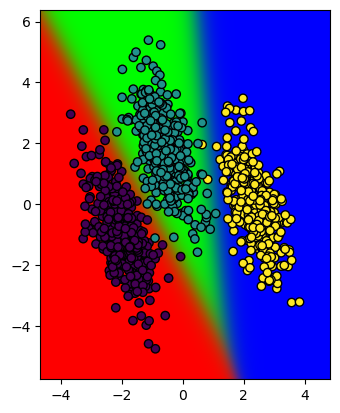

In [2]:
import warnings
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=2021)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

# define the plotting functions
def clf_bdy(clf, X, y):
    K=len(np.unique(y))
    # plot training points
    plt.scatter(X[:, 0], X[:, 1], c=plt.get_cmap('viridis',K).colors[y], edgecolor='k',cmap=plt.get_cmap('viridis'))
    
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], -1))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower", cmap=plt.get_cmap('viridis'))
    
# classify it and plot the boundary
clf = LogisticRegression(solver='sag', max_iter=100, random_state=2021,
                         multi_class='multinomial').fit(X, y)
clf_bdy(clf, X, y)

### iris data

Now consider iris data and classify them with the first two features using different methods. Let's load the data.

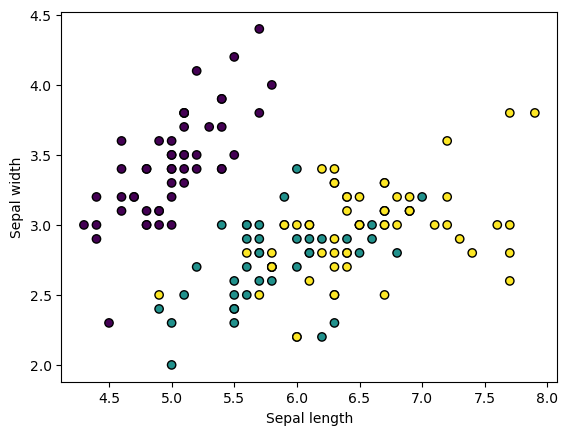

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
K=len(np.unique(y))
plt.scatter(X[:, 0], X[:, 1], c=plt.get_cmap('viridis',K).colors[y], edgecolor='k',cmap=plt.get_cmap('viridis'))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Question 1

Fit LDA and QDA models to the iris data and save the fitted models as **lda** and **qda** respectively.

In [ ]:
# Fit LDA and QDA


Now compare their decision boudaries in the following plot.

In [ ]:
# plot decision boundairs of LDA and QDA



### Question 2

Fit RandomForest and GaussianProcess models to the iris data. For RandomForest, use **50 random trees** (`n_estimators`). For GaussianProcess, use anisotropic **Radial-basis function** kernel (aka squared-exponential kernel, `RBF`). Save the fitted models as **rfc** and **gpc** respectively.

**Note! Plesae set `random_state=2023` in RandomForest**

In [ ]:
# Fit RandomForest and GaussianProcess


Now compare their decision boudaries in the following plot.

In [ ]:
# plot decision boundairs of RandomForest and GaussianProcess

